In [114]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

In [167]:
def model(r, a, b):
    return a*np.exp(-b*r**2)*np.exp(a*r**2)/b

In [168]:
def model_deriv(r, a, b):
    m1 = model(r+0.01, a, b)
    m2 = model(r, a, b)
    return (m1-m2)/0.01

In [169]:
r = np.linspace(0, 10, 20)

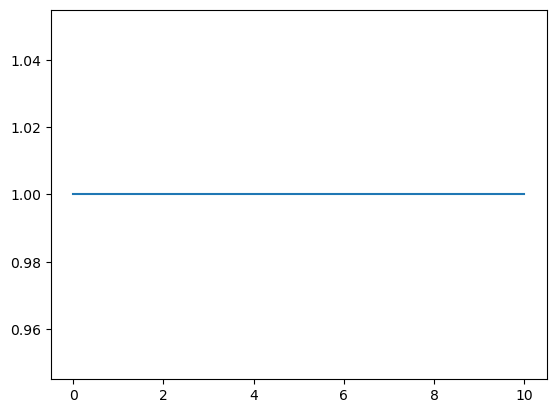

In [170]:
plt.plot(r, model(r, 1, 1))

In [171]:
def lnL(params):
    a, b = params
    if a < -10: return -np.inf
    if a > 10: return -np.inf
    if b < -10: return -np.inf
    if b > 10: return -np.inf
    a = model_deriv(r, a, b)
    test_neg = np.array([True if a_ < 0 else False for a_ in a])
    if len(test_neg[test_neg==True])!=0: return -np.inf
    else: return 1

In [172]:
lnL([1,1])

-inf

In [173]:
nwalker = 100
ndim=2
initial = [1,1]
pos = np.array(initial) + .01*np.random.randn(nwalker, ndim)
#pos = np.array(initial) + .01*np.random.randn(nwalker, 8)
#with Pool() as pool:
#sampler = emcee.EnsembleSampler(nwalker, 6, lnL, )#pool=pool)
sampler = emcee.EnsembleSampler(nwalker, ndim, lnL,)# pool=pool)
sampler.run_mcmc(pos, 300, progress=True);
flat_samples = sampler.get_chain(discard=0, thin=1, flat=True)

  5%|▌         | 16/300 [00:00<00:01, 153.78it/s]/tmp/ipykernel_5861/1017219239.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*r**2)*np.exp(a*r**2)/b
/tmp/ipykernel_5861/3477849216.py:4: RuntimeWarning: invalid value encountered in subtract
  return (m1-m2)/0.01
/tmp/ipykernel_5861/1017219239.py:2: RuntimeWarning: invalid value encountered in multiply
  return a*np.exp(-b*r**2)*np.exp(a*r**2)/b
/tmp/ipykernel_5861/1017219239.py:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*r**2)*np.exp(a*r**2)/b
 13%|█▎        | 39/300 [00:00<00:01, 196.09it/s]/tmp/ipykernel_5861/1017219239.py:2: RuntimeWarning: overflow encountered in divide
  return a*np.exp(-b*r**2)*np.exp(a*r**2)/b
/tmp/ipykernel_5861/3477849216.py:4: RuntimeWarning: overflow encountered in divide
  return (m1-m2)/0.01
100%|██████████| 300/300 [00:01<00:00, 254.60it/s]


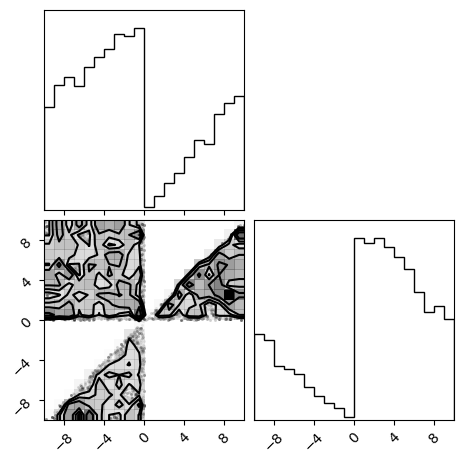

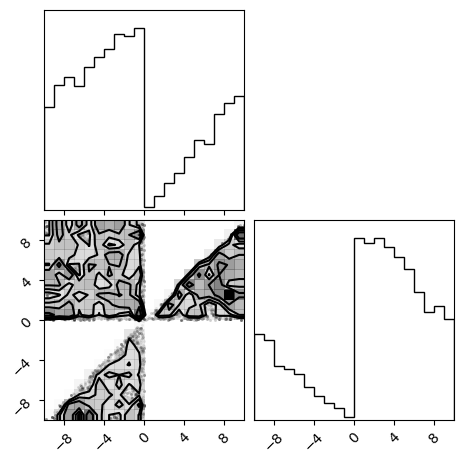

In [174]:
corner.corner(flat_samples[12000:])